authors: Toufik & Asma
Dans cette partie on va créer l'ensemble des services proposés à partir de la base de données
qu"on a prealablement créé

In [65]:
# Import modules
import pandas as pd
import mysql.connector
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
## Connect to database
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  passwd="Goodboy.5",
  database="insertion_pro",
  auth_plugin='mysql_native_password'
)
mycursor = mydb.cursor()

In [67]:
# Afficher tout les établissements qui ont changé de nom
mycursor.execute("SELECT nom_etablissement, nom_etablissement_actuel FROM etablissement WHERE nom_etablissement_actuel != nom_etablissement")
myresult = mycursor.fetchall()
# Conversion des résultats en dataframe
df = pd.DataFrame(myresult)

nom_etablissement = df[0]
nom_etablissement_actuel = df[1]

# afficher DataFrame
df

,0,1
0,Nice - Sophia-Antipolis,Université Côte d'Azur (UCA)
1,Bordeaux 1 - Sciences technologies,Université de Bordeaux
2,Bordeaux 2 - Victor Segalen,Université de Bordeaux
3,Bordeaux 4 - Montesquieu,Université de Bordeaux
4,Montpellier 1,Université de Montpellier
5,Montpellier 2 - Sciences techniques du Languedoc,Université de Montpellier
6,Grenoble 1 - Joseph Fourier,Université Grenoble Alpes (UGA)
7,Grenoble 2 - Pierre Mendès France,Université Grenoble Alpes (UGA)
8,Grenoble 3 - Stendhal,Université Grenoble Alpes (UGA)
9,Grenoble Alpes,Université Grenoble Alpes (UGA)


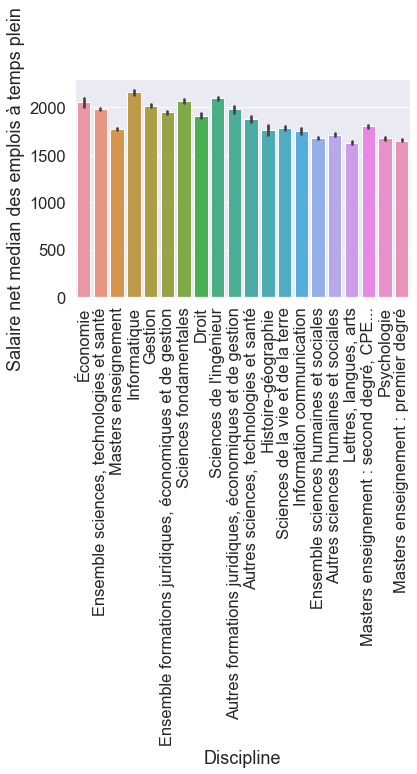

In [68]:
# Afficher les salaire_net_median_des_emplois_a_temps_plein les plus élevé et la discpline correspondante et l'établissement
mycursor.execute("SELECT nom_discipline, salaire_net_median_des_emplois_a_temps_plein FROM Etablissement join Statistiques on Etablissement.id_etablissement = Statistiques.id_etablissement JOIN  Discipline on Statistiques.id_discipline = Discipline.id_discipline ORDER BY salaire_net_median_des_emplois_a_temps_plein DESC ")
myresult = mycursor.fetchall()

# Conversion des résultats en dataframe
df = pd.DataFrame(myresult)

# Visualisation
sns.set(style="whitegrid")
sns.set(font_scale=1.5)
sns.barplot(x=df[0], y=df[1])
# set Name on Horizontal axis
plt.xlabel("Discipline")
# set Name on Vertical axis
plt.ylabel("Salaire net median des emplois à temps plein")
# set Title
plt.title("")

# Set the names of the disipline inside the barplot
plt.xticks(rotation=90)
plt.show()

In [76]:
# Afficher la part des femmes par discipline non nulle
mycursor.execute("SELECT distinct nom_discipline, femmes FROM Discipline join Statistiques using (id_discipline) where femmes is not null group by nom_discipline")
myresult = mycursor.fetchall()

# Conversion des résultats en dataframe
df = pd.DataFrame(myresult)

ProgrammingError: 1055 (42000): Expression #2 of SELECT list is not in GROUP BY clause and contains nonaggregated column 'insertion_pro.Statistiques.femmes' which is not functionally dependent on columns in GROUP BY clause; this is incompatible with sql_mode=only_full_group_by

In [70]:
# Affichage du salaire_net_median_des_emplois_a_temps_plein le plus élevé et le nom de  discpline correspondante et  le nom de l'établissement
mycursor.execute("select max(salaire_net_median_des_emplois_a_temps_plein), nom_etablissement, nom_discipline from statistiques join discipline on statistiques.id_discipline = discipline.id_discipline join etablissement on statistiques.id_etablissement = etablissement.id_etablissement")
myresult = mycursor.fetchall()
for x in myresult:
    print(x)

ProgrammingError: 1140 (42000): In aggregated query without GROUP BY, expression #2 of SELECT list contains nonaggregated column 'insertion_pro.etablissement.nom_etablissement'; this is incompatible with sql_mode=only_full_group_by

In [ ]:
# Affichages des salaire_net_mensuel_median_regional et de nom_académie correspondante par ordre décroissant en éliminant les doublons
mycursor.execute("select distinct salaire_net_mensuel_median_regional, nom_academie from statistiques join etablissement on statistiques.id_etablissement = etablissement.id_etablissement join academie on etablissement.id_academie = academie.id_academie ORDER BY salaire_net_mensuel_median_regional DESC")
myresult = mycursor.fetchall()
for x in myresult:
    print(x)
    

In [ ]:
# Affichage le taux_insertion par academie
mycursor.execute("select distinct taux_dinsertion, nom_academie from statistiques join etablissement on statistiques.id_etablissement = etablissement.id_etablissement join academie on etablissement.id_academie = academie.id_academie ORDER BY taux_dinsertion DESC")
myresult = mycursor.fetchall()
for x in myresult:
    print(x)

In [ ]:
# Affichage de toutes les université qui ont changé de nom
mycursor.execute("select distinct nom_etablissement, nom_etablissement_actuel from etablissement where nom_etablissement_actuel IS NOT NULL")
myresult = mycursor.fetchall()
for x in myresult:
    print(x)